In [79]:
import pandas as pd

df = pd.read_csv("../data/spotify-tracks-audio-features.csv")
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,class
0,0.000429,0.412,375627,0.655,0.048700,2,0.2900,-8.931,1,0.0538,88.573,4,0.102,6.0
1,0.995000,0.628,178525,0.156,0.234000,2,0.1090,-15.720,1,0.0960,135.022,1,0.366,2.0
2,0.296000,0.536,197232,0.552,0.000052,0,0.1040,-8.267,1,0.0365,112.016,4,0.182,9.0
3,0.000307,0.414,263077,0.852,0.002440,3,0.0953,-8.666,1,0.0817,129.963,3,0.118,8.0
4,0.766000,0.597,203613,0.271,0.011900,5,0.0933,-17.293,1,0.0394,76.271,4,0.338,0.0


<ipython-input-80-fbccebebde8d>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


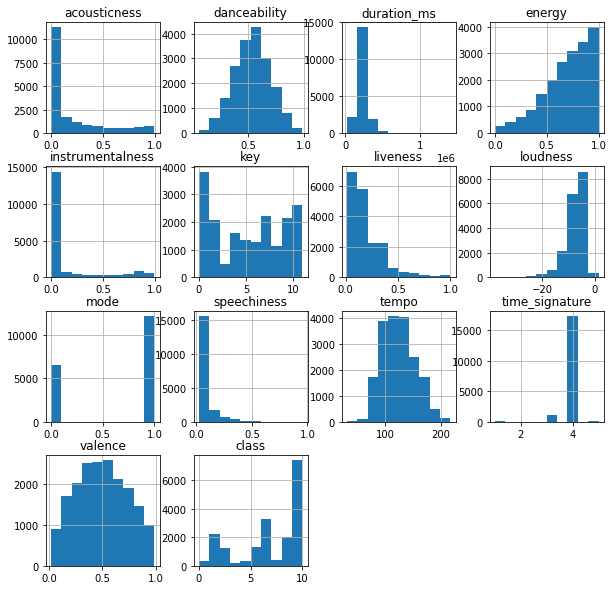

In [80]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [81]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'class'],
      dtype='object')

In [82]:
filter_columns = [
    "danceability", 
    "energy", 
    "key", 
    "tempo", 
    "valence", 
    "class"
]
df_filtered = df[filter_columns]
df_filtered

,danceability,energy,key,tempo,valence,class
0,0.412,0.655,2,88.573,0.1020,6.0
1,0.628,0.156,2,135.022,0.3660,2.0
2,0.536,0.552,0,112.016,0.1820,9.0
3,0.414,0.852,3,129.963,0.1180,8.0
4,0.597,0.271,5,76.271,0.3380,0.0
...,...,...,...,...,...,...
18745,0.528,0.163,7,98.417,0.1410,1.0
18746,0.484,0.833,7,87.516,0.2790,10.0
18747,0.741,0.562,4,180.068,0.2920,5.0
18748,0.252,0.147,2,108.025,0.0317,1.0


<ipython-input-83-1691b0a3da13>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_filtered.hist(ax = ax)


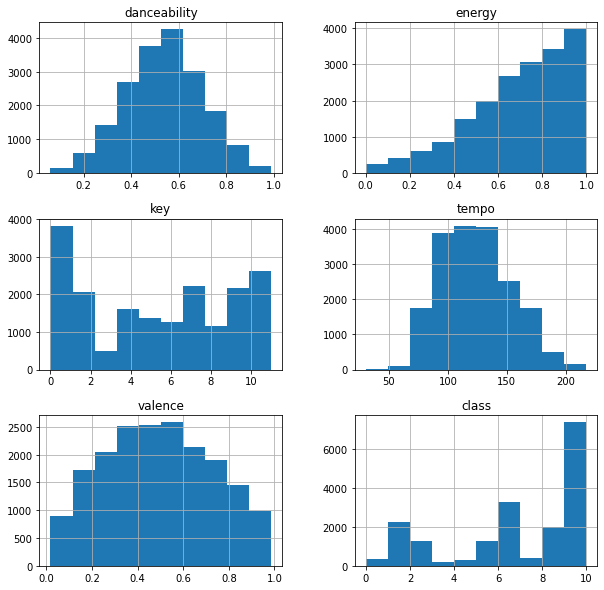

In [83]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

ax = fig.gca()
df_filtered.hist(ax = ax)
plt.show()

In [84]:
dataset = df_filtered.values
dataset

array([[4.12000e-01, 6.55000e-01, 2.00000e+00, 8.85730e+01, 1.02000e-01,
        6.00000e+00],
       [6.28000e-01, 1.56000e-01, 2.00000e+00, 1.35022e+02, 3.66000e-01,
        2.00000e+00],
       [5.36000e-01, 5.52000e-01, 0.00000e+00, 1.12016e+02, 1.82000e-01,
        9.00000e+00],
       ...,
       [7.41000e-01, 5.62000e-01, 4.00000e+00, 1.80068e+02, 2.92000e-01,
        5.00000e+00],
       [2.52000e-01, 1.47000e-01, 2.00000e+00, 1.08025e+02, 3.17000e-02,
        1.00000e+00],
       [4.18000e-01, 8.57000e-01, 8.00000e+00, 1.40020e+02, 1.20000e-01,
        1.00000e+01]])

In [85]:
m, n = dataset.shape
X, Y = dataset[:1000, :n-1], dataset[:1000, n-1]

In [86]:
import numpy as np

normalization_values = []
m, n = X.shape
X_norm = np.zeros(shape=(m, n))

for j in range(n):
    c_max = max(X[:, j])
    c_min = min(X[:, j])
    c_mean = sum(X[:, j]) / len(X[:, j])
    normalization_values.append((c_max, c_min, c_mean))

for i in range(m):
    for j in range(n):
        xi = X[i, j]
        c_max, c_min, c_mean = normalization_values[j]
        xi_norm = (xi - c_mean) / (c_max - c_min)
        X_norm[i, j] = xi_norm

X_norm

array([[-0.13980319, -0.06399159, -0.29790909, -0.22734355, -0.43821353],
       [ 0.1059306 , -0.5695333 , -0.29790909,  0.07184871, -0.15649333],
       [ 0.00126621, -0.16834188, -0.47972727, -0.07634   , -0.35284377],
       ...,
       [ 0.10365529,  0.20752179, -0.38881818, -0.23504736,  0.35465809],
       [ 0.22197156,  0.14774832, -0.38881818, -0.08931279,  0.31944307],
       [-0.24105461,  0.18523338, -0.47972727,  0.36346599,  0.00784345]])

In [87]:
legend = []
label = []

for x in Y:
    if x not in legend:
        legend.append(int(x % 23))
        label.append(f"class: {int(x)}")

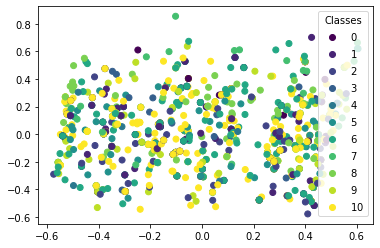

In [88]:
from time import time
from sklearn import decomposition

t0 = time()
pca = decomposition.TruncatedSVD(n_components=2)
X2 = pca.fit_transform(X_norm)

colors = [int(i % 23) for i in Y]
scatter = plt.scatter(X2[:, 0], X2[:, 1], c=colors)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

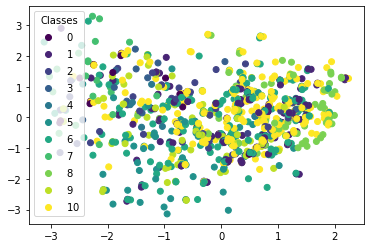

In [89]:
from sklearn import discriminant_analysis

X2: np.ndarray = X_norm.copy()
X2.flat[::X_norm.shape[1] + 1] += 0.01
t0 = time()
X2 = discriminant_analysis.LinearDiscriminantAnalysis(
    n_components=2).fit_transform(X2, Y)

colors = [int(i % 32) for i in Y]
plt.scatter(X2[:, 0], X2[:, 1], c=colors)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

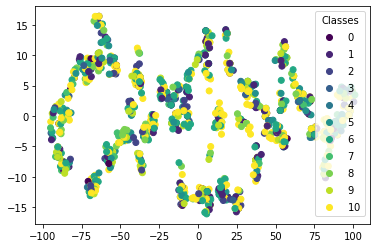

In [90]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X2 = tsne.fit_transform(X)

colors = [int(i % 23) for i in Y]
plt.scatter(X2[:, 0], X2[:, 1], c=colors)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()